In [ ]:
#Prediction of Stock
#import lib
import numpy as np
import pandas as pd
import datetime as dt

df = pd.read_csv('TSLA.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2991,2022-05-16,767.159973,769.760010,719.090027,724.369995,724.369995,28699500
2992,2022-05-17,747.359985,764.479980,728.849976,761.609985,761.609985,26745400
2993,2022-05-18,744.520020,760.500000,700.809998,709.809998,709.809998,29270600
2994,2022-05-19,707.000000,734.000000,694.109985,709.419983,709.419983,30098900


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2991,2022-05-16,724.369995
2992,2022-05-17,761.609985
2993,2022-05-18,709.809998
2994,2022-05-19,709.419983


In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)




In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
2991   2022-05-16
2992   2022-05-17
2993   2022-05-18
2994   2022-05-19
2995   2022-05-20
Name: Date, Length: 2996, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df


,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


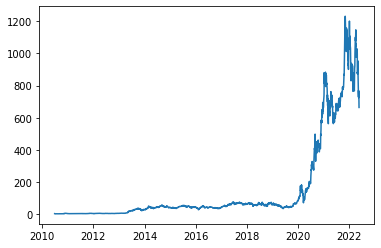

In [ ]:
import matplotlib.pyplot as plt

plt. plot(df.index,df['Close'])

In [ ]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                '2021-10-25', 
                                '2022-05-20', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-10-25,865.799988,894.000000,909.679993,1024.859985
1,2021-10-26,894.000000,909.679993,1024.859985,1018.429993
2,2021-10-27,909.679993,1024.859985,1018.429993,1037.859985
3,2021-10-28,1024.859985,1018.429993,1037.859985,1077.040039
4,2021-10-29,1018.429993,1037.859985,1077.040039,1114.000000
...,...,...,...,...,...
140,2022-05-16,734.000000,728.000000,769.590027,724.369995
141,2022-05-17,728.000000,769.590027,724.369995,761.609985
142,2022-05-18,769.590027,724.369995,761.609985,709.809998
143,2022-05-19,724.369995,761.609985,709.809998,709.419983


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((145,), (145, 3, 1), (145,))

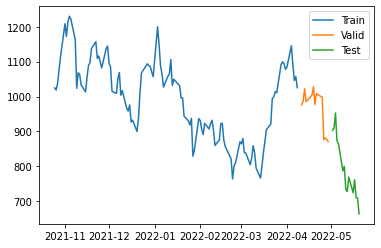

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Valid', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate= 0.009),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

Epoch 1/200
4/4 [==============================] - 3s 179ms/step - loss: 1003533.1250 - mean_absolute_error: 995.4304 - val_loss: 927205.3125 - val_mean_absolute_error: 961.2101
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 997613.3750 - mean_absolute_error: 992.4636 - val_loss: 919326.6250 - val_mean_absolute_error: 957.1029
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 986851.8125 - mean_absolute_error: 987.0306 - val_loss: 904136.3125 - val_mean_absolute_error: 949.1342
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 968774.0625 - mean_absolute_error: 977.7895 - val_loss: 880213.1250 - val_mean_absolute_error: 936.4468
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 940036.5625 - mean_absolute_error: 962.9946 - val_loss: 844180.0000 - val_mean_absolute_error: 917.0057
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 897372.1250 - mean_absolute_error: 940.5555 - 

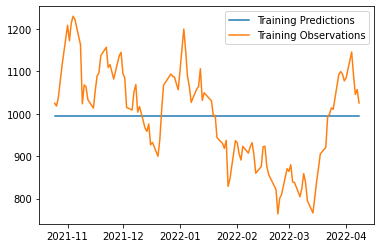

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

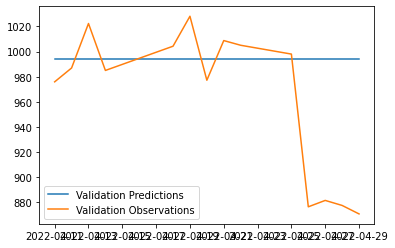

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

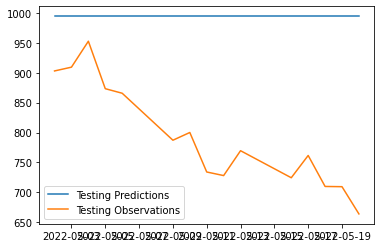

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

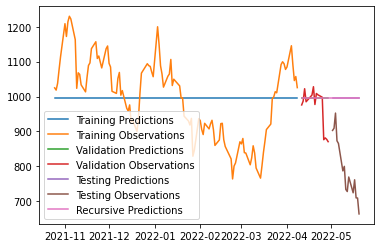

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])
